# Lab -- Wolff Algorithm

**Please write your name in this box**

*We encourage you to work together, and seek whatever help you need in completing this lab.  Please list all people who you worked with or received help from*

*We encourage you to use any online resources that you find useful. Please list any URL's that you consulted*

*We encourage you to use AI resources if you find them useful.  If you made use of AI, please list the platform and the prompts which you made use of*

<h2 style="border: 2px solid #000; border-radius: 10px; padding: 20px; background-color:red; color:white;" >
## Some useful plotting features
</h2>

In [1]:
using GLMakie
using CairoMakie
using OffsetArrays
using Random
using ProgressMeter
using Statistics
using DataStructures
using LinearAlgebra
using LaTeXStrings
using HDF5
CairoMakie.activate!(type = "png")

Feel free to use either `Makie` or `Plots.jl` for this activity.  The advantage of `Makie` is that we can easily swap between the  `Cairo` and `GL` backends to display animations.  It also makes nice plots.  

Of course the syntax is a bit different.  Here is sort of a base-case `Makie` plot, illustrating how to label the axes, and have a legend.

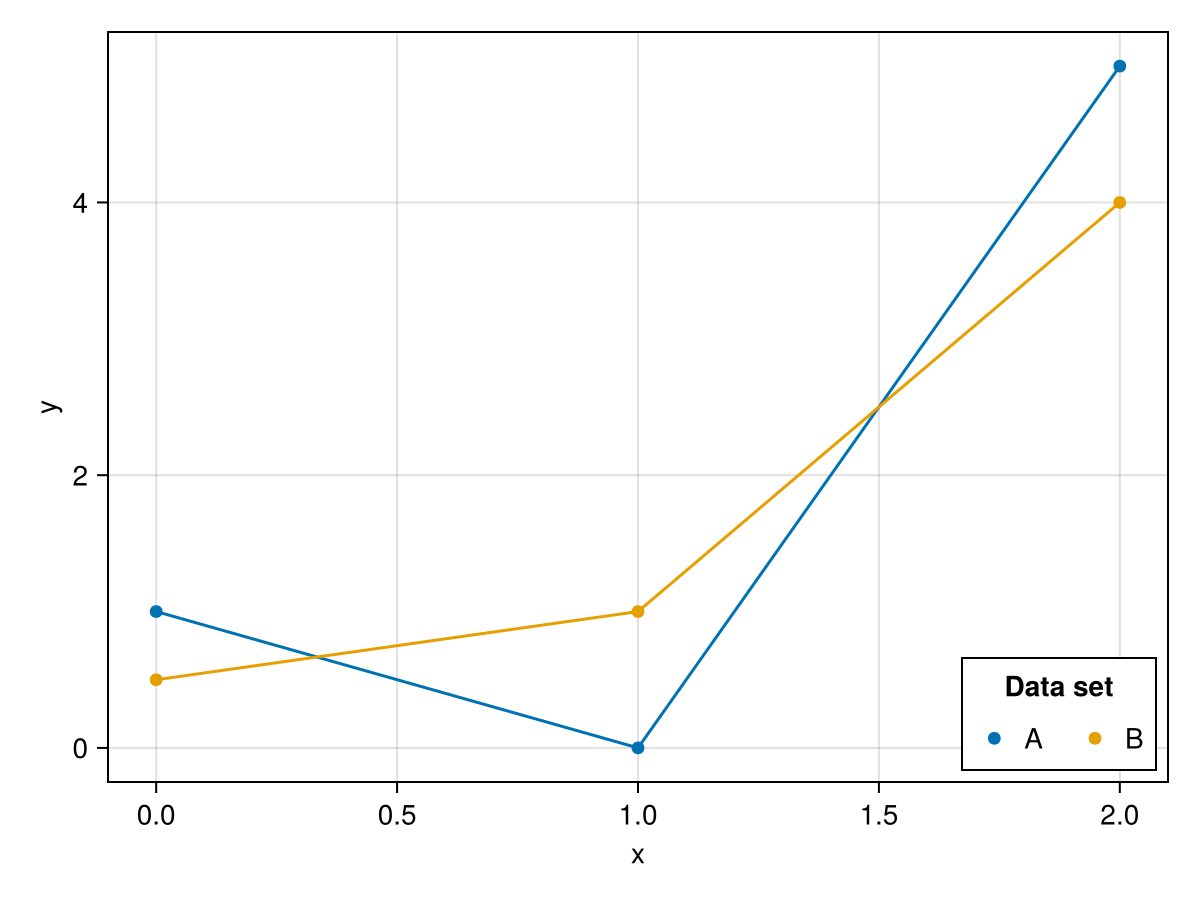

In [2]:
p=plot([0,1,2],[1,0,5],axis=(xlabel="x",ylabel="y"),label="A")
lines!([0,1,2],[1,0,5])
plot!([0,1,2],[0.5,1,4],label="B")
lines!([0,1,2],[0.5,1,4])
axislegend("Data set", position = :rb, orientation = :horizontal)
p

One of the really confusing thing with `Makie` is that there are about 100000 ways to do anything.  Here is an alternate way to do the same thing:

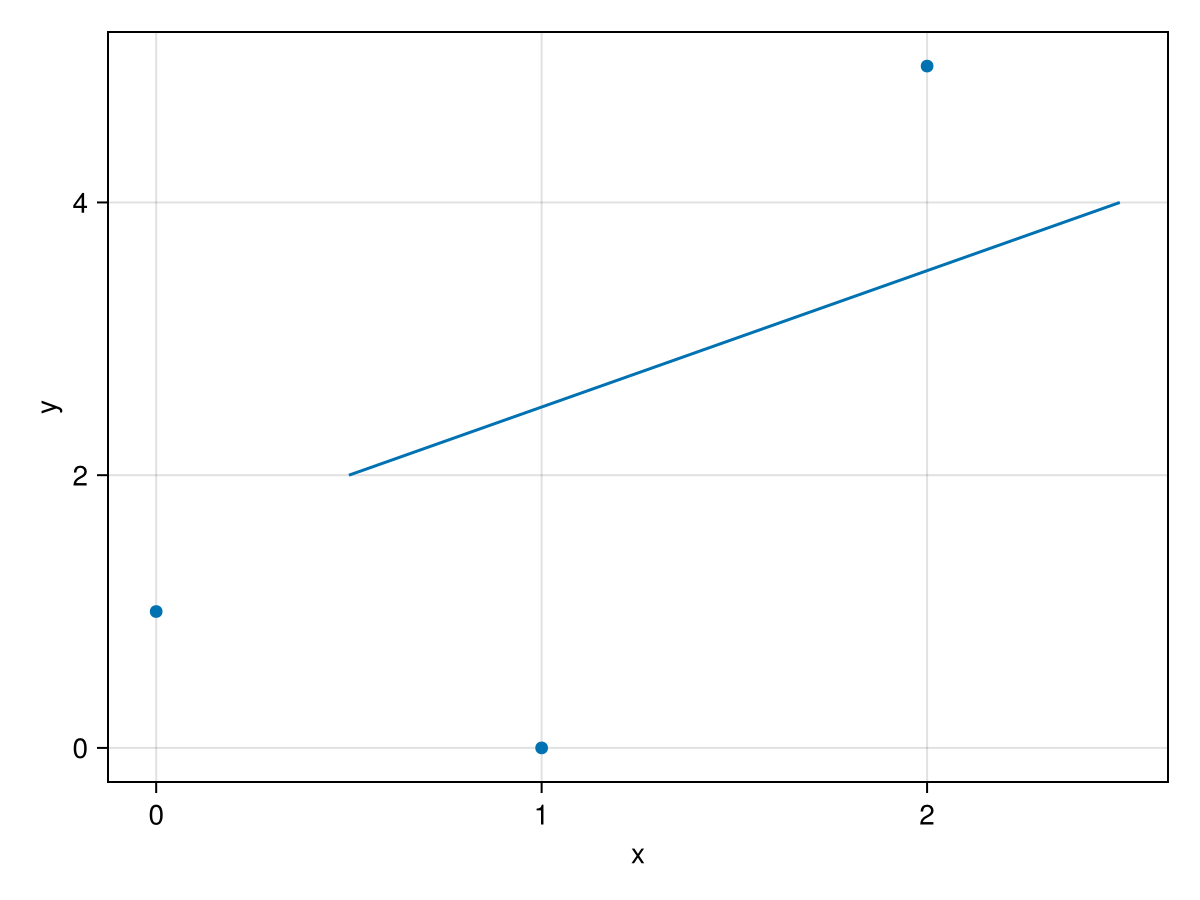

In [3]:
p=plot([0,1,2],[1,0,5])
p.axis.xlabel="x"
p.axis.ylabel="y"
l=lines!([(0.5,2),(2.5,4)])
p

Yet another approach

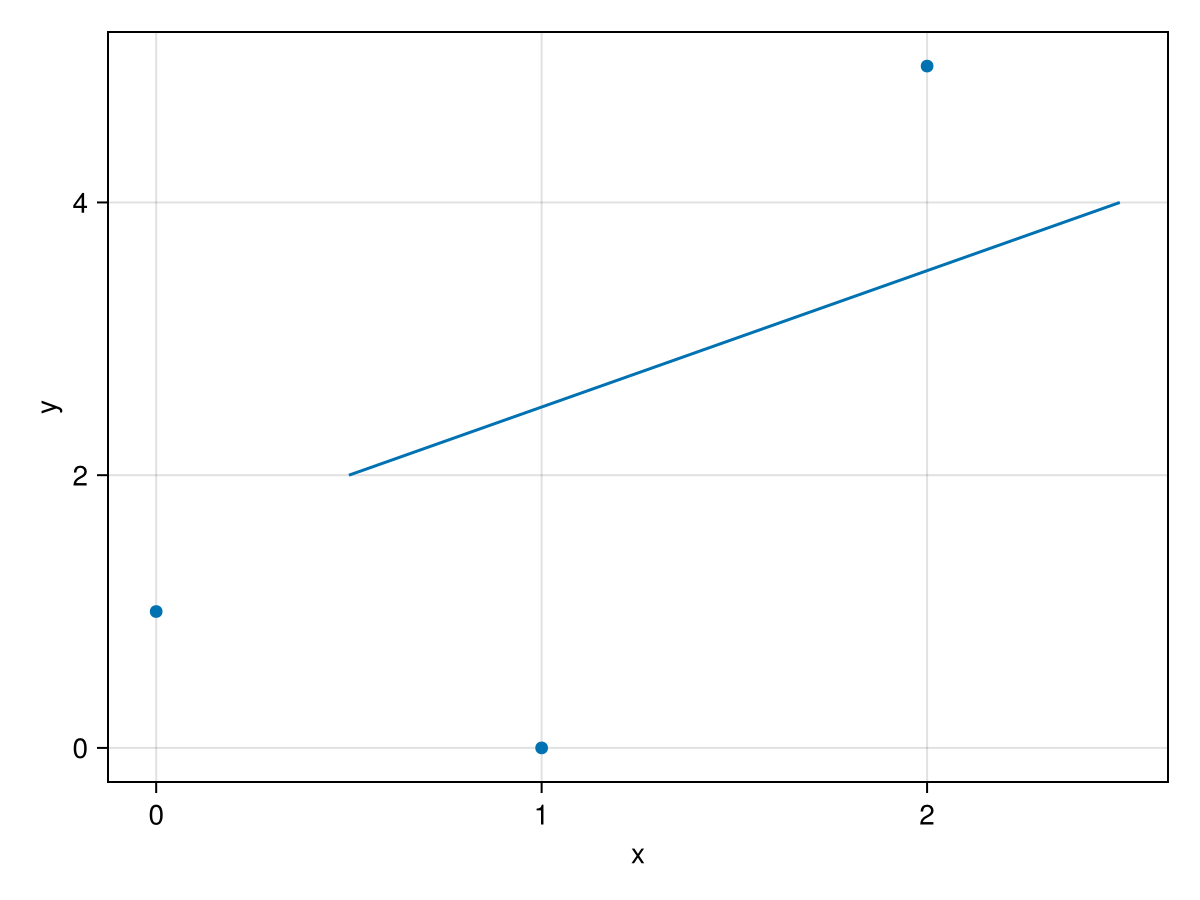

In [4]:
f=Figure()
ax=Axis(f[1,1],xlabel="x",ylabel="y")
p=plot!(ax,[0,1,2],[1,0,5])
l=lines!(ax,[(0.5,2),(2.5,4)])
f

Here is how to put the legend beside the plot instead of on top.

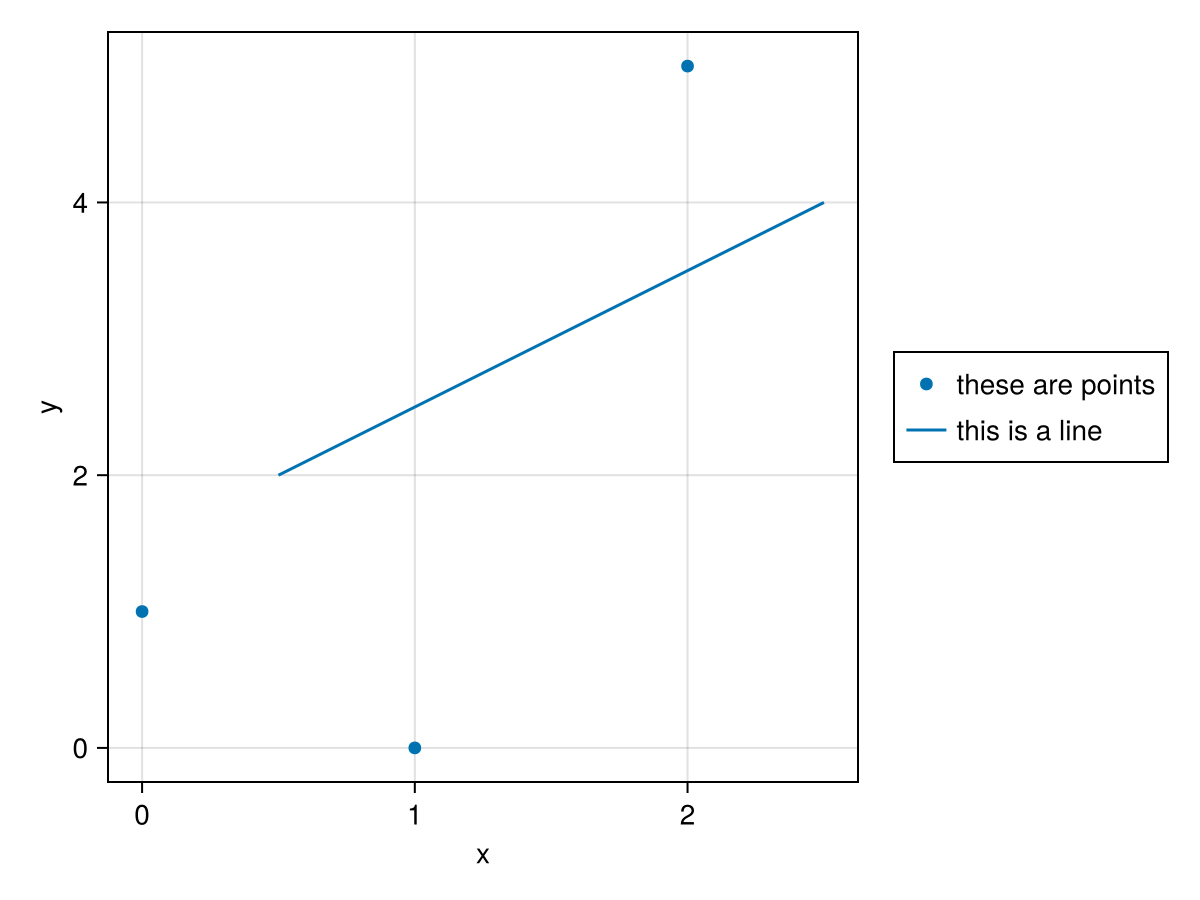

In [5]:
f=Figure()
ax=Axis(f[1,1],xlabel="x",ylabel="y")
p=plot!(ax,[0,1,2],[1,0,5])
l=lines!(ax,[(0.5,2),(2.5,4)])
leg=Legend(f[1,2],[p,l],["these are points","this is a line"])
f

<h2 style="border: 2px solid #000; border-radius: 10px; padding: 20px; background-color:red; color:white;" >
## Activity 1
</h2>

Implement the Wolff algorithm.  You want to make a replacement for the `randlocalupdate!` function that we previously worked with.  Call it `wolffupdate!`.

This function should take arguments `s`, `pbar`, and `numclusters`:
`s` is the initial configuration.
`pbar`$=e^{-2 \beta J}$ is the probability that we do not add a spin to the cluster.
`numcluster` is a parameter which tells us how many times to run the Wolff algorithm.  For initial testing we will take `numcluster=1`, and just flip a single cluster.  

We would like `wolfupdate` to return the total number of spins flipped (which is a useful diagnostic).

For now just implement the algorithm without a magnetic field.

In [6]:
function wolfupdate!(s,pbar,numclusters)
    #
    #
end

wolfupdate! (generic function with 1 method)

Test to make sure the function runs.  In the next section we will test to see if it is giving the expected result

<h2 style="border: 2px solid #000; border-radius: 10px; padding: 20px; background-color:red; color:white;" >
## Activity 2
</h2>

To test things out, we will take a small lattice (3x3), and start with a simple configuration:

    s0= [1 1 1
         1 1 1
         1 1 1]

In this configuration, the probability of flipping 1 spin is $\bar p^4$.  Choose $\bar p= (1/2)^{1/4}$.  Run the `wolfupdate!` function many times, resetting $s$ to $s0$ every time.  Verify that you get $1$ flipped spin roughly half the time.

From this uniform configuration, the probability of flipping 2 spins is $P_2=4 \bar p^6 (1-\bar p)$.  This gives $P_2=0.225$.

Use the following function to see if you get the right probabilities.  To get good statistics take `num` to be `100,000`.

In [8]:
function binflips(pbar,num)
    flips=zeros(Int64,9)
    for j in 1:num
        s=[1 1 1
           1 1 1
           1 1 1]
        f=wolfupdate!(s,pbar,1)
        flips[f]+=1
    end
    return flips
end

binflips (generic function with 1 method)

<h2 style="border: 2px solid #000; border-radius: 10px; padding: 20px; background-color:red; color:white;" >
## Activity 3
</h2>

We now want to verify that this algorithm is giving us the same results as our simpler local update one.  Write a function `wolfsimulate!`, which is analogous to our old `simulate!`, but uses the Wolff update. Here is a good signature to use

    wolfsimulate!(s,β::Float64,h::Float64,
        innersweeps::Int64,outersweeps::Int64)

(We won't actually use $h$,but it is useful to make the signature the same as `simulate!`). Here is the `return` statement that I used

    return (Elist=Elist ,maglist=maglist, 
        fliplist=fliplist,dims=size(s) ,β=β ,h=0 ,innersweeps=innersweeps)


Also make a copy of our old `simulate!` function -- as we need to compare the two.

Use each function to calculate a histogram of the magnetization at $\beta=0.2$ for a $4\times 4$ lattice.   See if they agree.

Try again at $\beta=0.8$.  

Finally try at $\beta=0.4$.

If things agree at those 3 points, then you likely have everything implemented correctly.

Some pointers:

(1) The $\beta=0.8$ runs will likely disagree -- but they will disagree in a good way.

(2) Don't forget to "burn" the first few outputs of the Markov chain, to make sure that you are not influenced by your initial conditions.  Because we are working with such a small system, you only need to burn a relatively small number of realizations (I used 100, and it worked fine).

(3) Don't worry about error bars at this point.  The idea with using a small system is that things run fast enough that we know we will get reliable statistics.

Finally, if you want to use `Plots.jl` for the histograms, you can use the notation we used in the Correlations lecture.  If you want to use `Makie.jl` here is an example:

    β1=0.2
    #
    s1=rand_ising2d(4,4)
    s2=rand_ising2d(4,4)
    # burn some realizations
    simulate!(s1,β1,0.,100,1)
    wolfsimulate!(s2,β1,0.,100,1)
    #
    local02= simulate!(s1,β1,0.,1,10000)
    wolf02=wolfsimulate!(s2,β1,0.,1,10000)
    #
    f=Figure()
    ax=Axis(f[1,1],
        xlabel="m",ylabel="p",
        title="β="*string(β1))
    h1=hist!(ax,local02.maglist)
    h2=hist!(ax,wolf02.maglist)
    Legend(f[1,2],[h1,h2], 
        ["local","wolff"])
    f


<h2 style="border: 2px solid #000; border-radius: 10px; padding: 20px; background-color:red; color:white;" >
## Activity 4
</h2>

Modify the function `Isingviz` so that it uses the Wolff algorithm.  Watch how the updates work at various temperatures.

Don't forget to use `GLMakie.activate!()` to switch to the GL backend if you have been using `CairoMakie`.

<h2 style="border: 2px solid #000; border-radius: 10px; padding: 20px; background-color:red; color:white;" >
## Activity 4
</h2>

We now need to get a rough estimates of the relaxation time for the Wolff algorithm.  The Wolff algorithm tends to flip small clusters at high temperatures, and big clusters at low temperatures.  Thus it makes sense to measure "time" not in how many Wolff steps we have used, but rather in how many spins we have flipped.  

Right now your code should return `flist`, which is a list of how many spins were flipped in each step of the algorithm.  We can change this into a cumulative count of flips with

In [22]:
function faccumulate(data)
    result=Float64[data...] # make a copy -- as a list of floats
    for j in 2:length(result)
        result[j]+=result[j-1]
    end
    return result
end

faccumulate (generic function with 1 method)

I convert the data to a list of floats because the plotting software prefers that over a list of integers -- but it is not really necessarily, just convenient

In [23]:
faccumulate([1,3,1,1,5])

5-element Vector{Float64}:
  1.0
  4.0
  5.0
  6.0
 11.0

Run your Wolff simulation for a 128x128 system, starting from a random configuration at $\beta=0.2$.  Plot the energy vs `f/N` -- where `f` is the accumulated number of flipped spins, and `N=128^2` is the total number of spins.  Choose the length of the run so that you can see a nice equilibration.

Repeat with a 64x64 system.  Plot the two on the same graph.  In these variables, how does the equilibration time seem to depend on system size.

<h2 style="border: 2px solid #000; border-radius: 10px; padding: 20px; background-color:red; color:white;" >
## Activity 4b
</h2>

Repeat the last activity, but this time with $\beta=0.44$.  

Recall that for the local update model, for 64x64, we found a relaxation time which was many thousands of sweeps (and one sweep was essentially flipping all of the spins once).  Here you will find the relaxation time is just a few sweeps.

<h2 style="border: 2px solid #000; border-radius: 10px; padding: 20px; background-color:red; color:white;" >
## Activity 4c
</h2>

Repeat with $\beta=0.6$

<h2 style="border: 2px solid #000; border-radius: 10px; padding: 20px; background-color:red; color:white;" >
## Activity 5
</h2>

You should have seen that the energy relaxation time for the Wolff algorithm is just a few sweeps (where a sweep is a number of cluster moves that flip roughly every spin).  We will also see that the energy correlation time is similar (and the magnetization correlation time is about a factor of 5 smaller).

Thus mans that the number of necessary cluster flips is larger at high temperature than at low temperature: The Wolff algorithm tends to flip small clusters at high temperatures, and big clusters at low temperatures.  Thus if we run our algorithm with a fixed number of steps we will generate fewer independent realizations at high temperature than at low temperature.

A simple way to deal with this is to: 
(1) run the algorithm for a fixed number of realizations. From that short run extract the average cluster size `averageclustersize`.  (2) Set `innersweeps` so that each run of the inner loop on average flips the desired number of spins (for example, I like to take `innersweeps=ceil(Int64,α*m*n/averageclustersize)`), where `α` is a parameter which sets roughly what fraction of the spins get flipped on each iteration of the inner loop. I find `α=1/10` works OK, but you can certainly play with it.   

Write a function

    fullsimulate!(s,β::Float64,h::Float64,burnsweeps::Int64,outersweeps::Int64)

It should first run `wolfsimulate` for 10 steps.  From those 10 steps it extracts an average cluster size.  

Note: If you run `sim=wolfsimulate(s,β,0,10,1)` then `sim.fliplist` will be a list with a single entry,  `[10 x averageclustersize]`.  

You then burn `numburn=burnsweeps*innersweeps-10` steps (if that number is greater than 1).

During the equilibration the average cluster size may have changed.  Do another run of 10 steps: `sim=wolfsimulate(s,β,0,10,1)`.  Extract the new average cluster size.

Finally, run the data collection run, using `innersweeps=round(Int64,m*n/(10*averageclustersize))`, and `outersweeps` given by the argument of the function.  Note, you can play with that factor of 10.

For debug purposes it is nice if your `fullsimulate!` function outputs what value of `innersweeps` it used.  A nice construction is:

    result=wolfsimulate(s,β,0.,innersweeps,outersweeps)
    return (;result...,innersweeps=innersweeps)

Make sure it runs with no errors.  The next activity will actually check to see if it is working right.

In [29]:
function fullsimulate!(
        s,β::Float64,h::Float64,
        burnsweeps::Int64,outersweeps::Int64)
    m,n=size(s)
    # do a short run to extract average cluster size
    #
    #  insert code here
    #
    if burnsweeps*innersweeps>10
        # complete the burn
        #
        #
        #
    end
    # do another short run to 
    # extract new average cluster size
    #
    #
    #
    # do final run of algorithm
    innersweeps=ceil(Int64,m*n/(10*averageclustersize))
    result=wolfsimulate!(s,β,0.,innersweeps,outersweeps)
    return(;result...,innersweeps=innersweeps)
end

fullsimulate! (generic function with 1 method)

<h2 style="border: 2px solid #000; border-radius: 10px; padding: 20px; background-color:red; color:white;" >
## Activity 6
</h2>

We now want to test our code to see if it is working.  Run the following sequence.  On my computer all of the timings were fractions of a second.  Note, we are using the final configuration from one temperature as the starting configuration for the next.

In [31]:
st=rand_ising2d(64,64)
@time tst2=fullsimulate!(st,0.2,0.,10,1000);
@time tst3=fullsimulate!(st,0.3,0.,10,1000);
@time tst4=fullsimulate!(st,0.4,0.,10,1000);
@time tst5=fullsimulate!(st,0.5,0.,10,1000);
@time tst6=fullsimulate!(st,0.6,0.,10,1000);

  0.064622 seconds (10.68 k allocations: 1.408 MiB, 11.05% compilation time)
  0.090315 seconds (3.39 k allocations: 1.884 MiB)
  0.085439 seconds (4.11 k allocations: 4.775 MiB)
  0.278985 seconds (6.43 k allocations: 85.277 MiB, 3.08% gc time)
  0.297549 seconds (6.87 k allocations: 101.576 MiB, 2.33% gc time)


Use the following code to plot time-series of the energies.  You should visually see that they are well equilibrated.  You should also visually see that the correlation time is about 10 steps.  This 10 is exactly the `1/\alpha` in how you chose `innersweeps` 

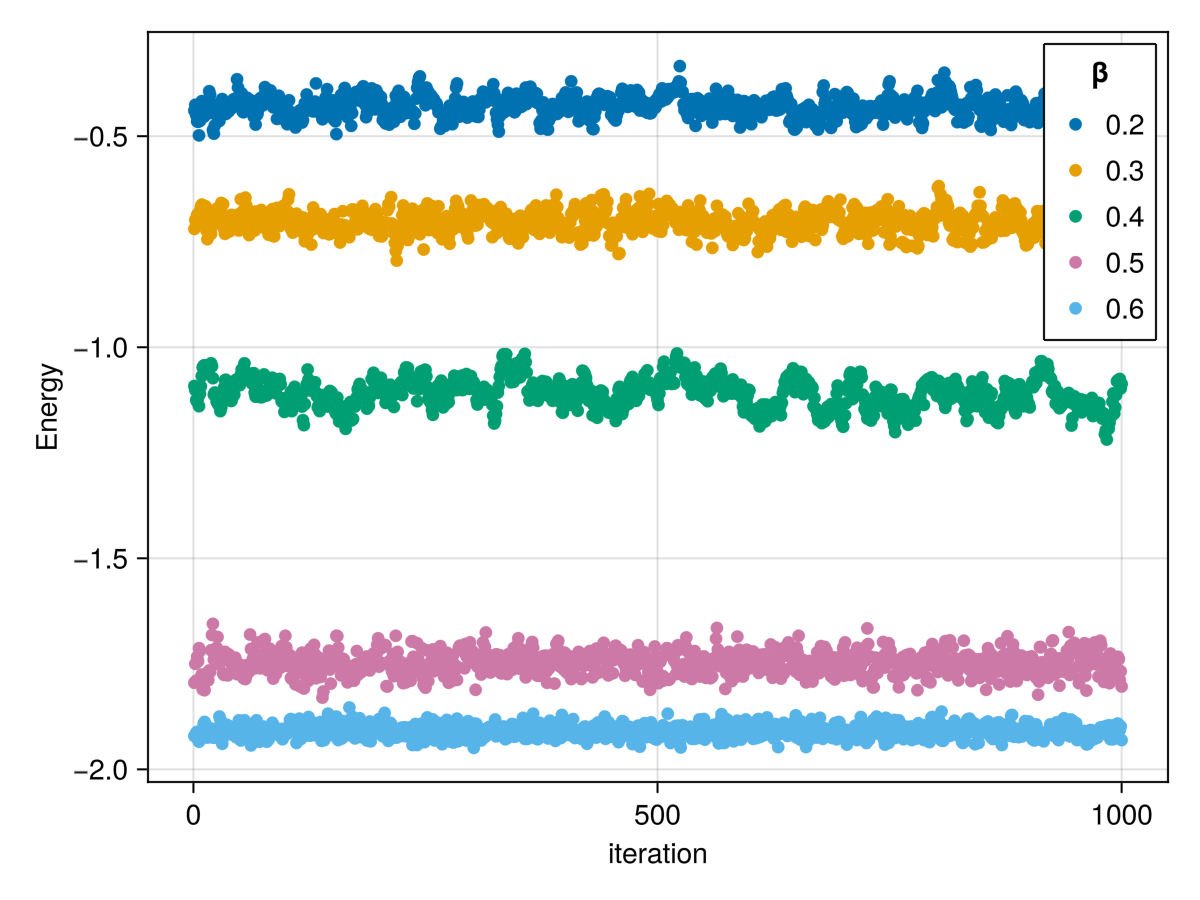

In [32]:
p=plot(tst2.Elist,label="0.2")
plot!(tst3.Elist,label="0.3")
plot!(tst4.Elist,label="0.4")
plot!(tst5.Elist,label="0.5")
plot!(tst6.Elist,label="0.6")
axislegend("β")
p.axis.xlabel="iteration"
p.axis.ylabel="Energy"
p

Make a similar set of plots for the absolute value of the magnetization.  The `β=0.2,0.3,0.4` data should look qualitatively different from the `β=0.5,0.6`

Now lets look at the autocorrelation functions

In [34]:
function autocorrelation(values,largestsep)
    m=mean(values)
    timesteps=length(values)
    [(values[1+j:end]⋅values[1:end-j])/(timesteps-j)-m^2 for j in 0:largestsep]
end

autocorrelation (generic function with 1 method)

Generate the autocorrelation functions for the absolute value of the magnetization, taking `largestsep=10`.  Also calculate the autocorrelation functions for the energy.  Here take `largestsep=20`, as the energy autocorrelation time is longer than the magnetization autocorrelation time.  Plot these using "stacked" plots.  For example, for the energy you could do:

    f=Figure()
    a2=Axis(f[1,1],ylabel="<Ei Ej>")
    a3=Axis(f[2,1],ylabel="<Ei Ej>")
    a4=Axis(f[3,1],ylabel="<Ei Ej>")
    a5=Axis(f[4,1],ylabel="<Ei Ej>")
    a6=Axis(f[5,1],ylabel="<Ei Ej>",xlabel="|i-j|")
    plot!(a2,ecor2)
    hidexdecorations!(a2)
    a2.title="β=0.2"
    plot!(a3,ecor3)
    hidexdecorations!(a3)
    a3.title="β=0.3"
    plot!(a4,ecor4)
    hidexdecorations!(a4)
    a4.title="β=0.4"
    plot!(a5,ecor5)
    hidexdecorations!(a5)
    a5.title="β=0.5"
    plot!(a6,ecor6)
    a6.title="β=0.6"
    f

If it doesn't look good, try increasing the number of iterations you use in generating your data.  (To make the energy autocorrelation function look good I needed to use 10000 samples instead of just 1000).

<h2 style="border: 2px solid #000; border-radius: 10px; padding: 20px; background-color:red; color:white;" >
## Activity 7
</h2>

Now that we have tuned things to make sure the algorithm is equilibrating, and we understand the correlation times.  We want to step through temperatures, and calculate the absolute values of the mean magnetization, and statistical error bars.

There are a couple strategies here.  One is to just store the information that you care about (the mean and error bars), the other is to store the entire time-sequence.  The latter is clearly much more expensive in both time and storage space.  The advantage, however, is that we can use the time-sequence data for debugging or to calculate new things that we did not anticipate.  You could even store the entire sequence of spin configurations.  That is almost always prohibitively expensive.

Since our `fullsimulate!` function already returns the time series for magnetizations and energies, lets begin with that.

Make a function            
            
    tempsweep(m,n,initialbeta,finalbeta,betastep,
                burnsweeps,outersweeps)

It should create a random `m x n` Ising array, `s`.  It then steps through temperatures, running `fullsimulate!` on this array -- reusing the final configuration of one temperature as the first configuration of the next.  

The output will be a `Sweepdata` object.  This is a `mutable struct` that you construct with the following fields (feel free to add more fields if there is more you want to save:

    arraysize  # stores the numbers (m,n)
    betas # list of the beta's used
    maglists  # list of the magnetization time series
    Elists    # list of the energy time series

Test with a small (say $8\times 8$) system where you can get away with very small `burnsweeps=10` and `outersweeps=100`.  Use it to make a plot $\langle |m|\rangle$ vs $\beta$ for this small system.  Take a pretty coarse temperature grid (say run $\beta$ from 0.2 to 0.6 in steps of 0.1).  You do not need to estimate the error bars (yet).

If that works, try a $64\times 64$ system, using `burnsweeps=10` and `outersweeps=1000`, taking $\beta$ from 0.2 to 0.6 in steps of 0.02.  Again plot $\langle |m|\rangle$ vs $\beta$.

If you plot these two data-sets on top of one-another you should start to see signatures of the phase transition.  A key feature is the size-dependence of the results.  We will use that size dependence as our principle tool for quantifying the phase transition.



Note:  Here is an error message that I encountered, and a way to fix it

In [43]:
βlist1=[]
push!(βlist1,0.2)
push!(βlist1,0.4)
push!(βlist1,0.6)
mlist1=[0.5,0.3,0.2]
# The following command will cause an error message
plot(βlist1,mlist1)

LoadError: `Makie.convert_arguments` for the plot type Scatter and its conversion trait PointBased() was unsuccessful.

The signature that could not be converted was:
::Vector{Any}, ::Vector{Float32}

Makie needs to convert all plot input arguments to types that can be consumed by the backends (typically Arrays with Float32 elements).
You can define a method for `Makie.convert_arguments` (a type recipe) for these types or their supertypes to make this set of arguments convertible (See http://docs.makie.org/stable/documentation/recipes/index.html).

Alternatively, you can define `Makie.convert_single_argument` for single arguments which have types that are unknown to Makie but which can be converted to known types and fed back to the conversion pipeline.


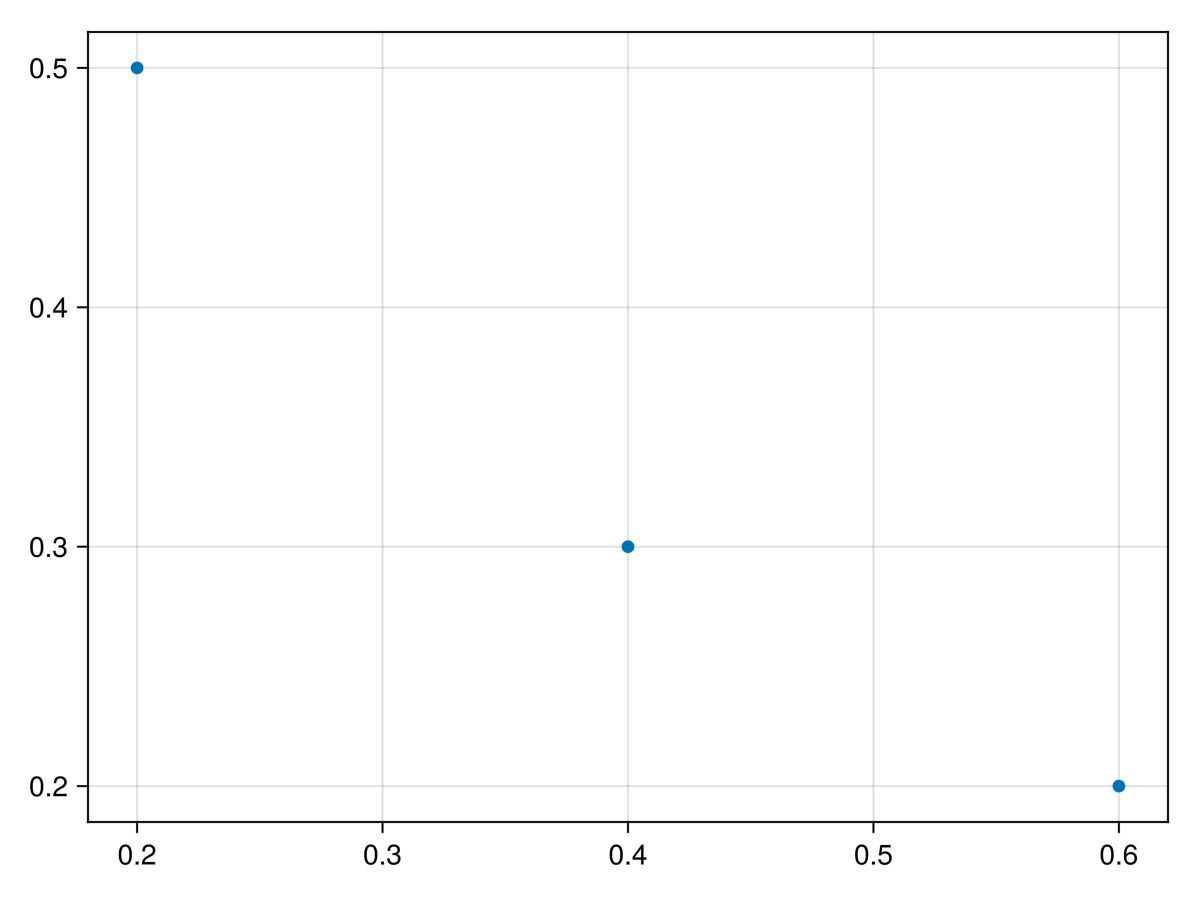

In [45]:
# The fix is to use
plot([βlist1...],mlist1)

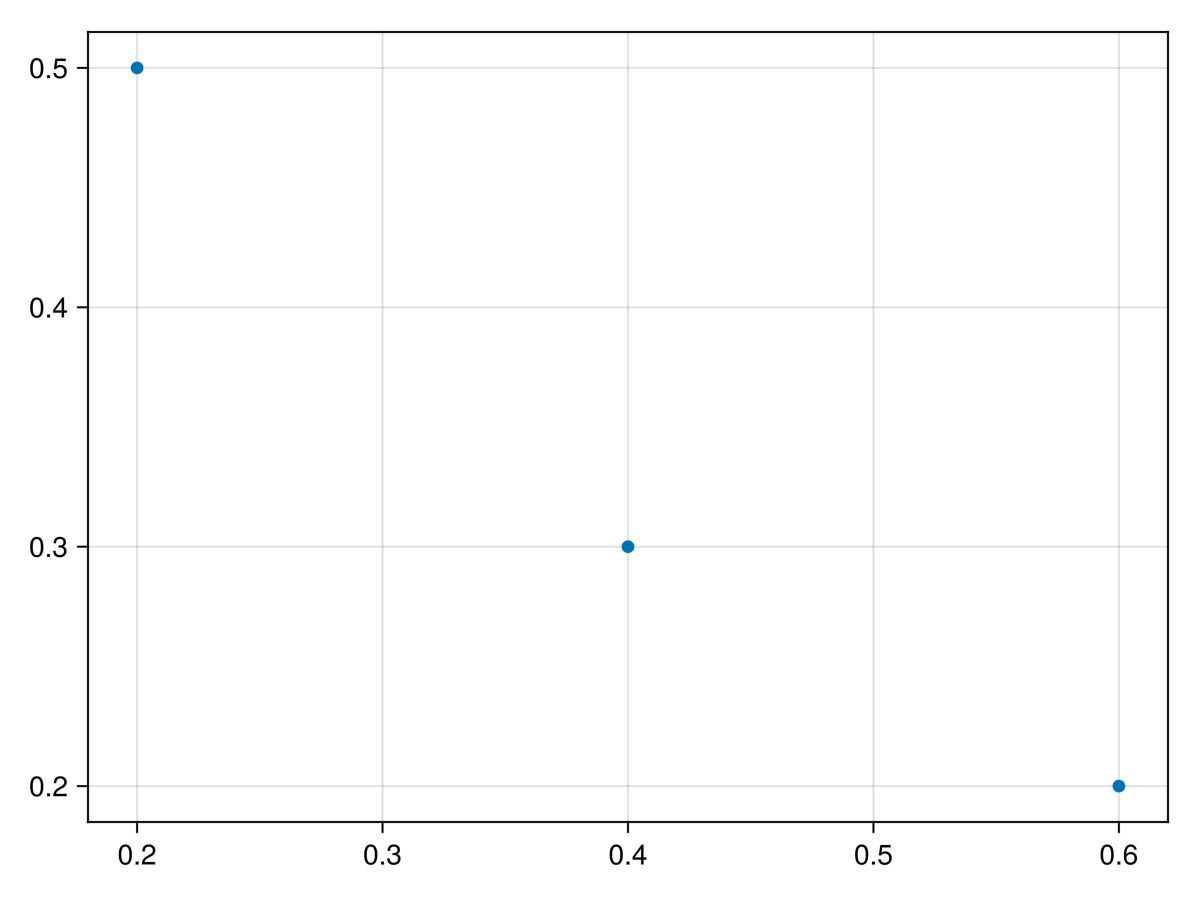

In [49]:
# An alternative fix is to declare the data type when creating it
βlist1=Array{Float64,1}()
# or equivalently: βlist1=Float64[]
push!(βlist1,0.2)
push!(βlist1,0.4)
push!(βlist1,0.6)
mlist1=[0.5,0.3,0.2]
# The following command will cause an error message
plot(βlist1,mlist1)

Here is a start for your code:

In [ ]:
mutable struct Sweepdata
    # insert code here
end

function tempsweep(m,n,initialbeta,finalbeta,betastep,burnsweeps,outersweeps)
    s=rand_ising2d(m,n)
    β=initialbeta
    arraysize=(m,n)
    energylists=[]
    maglists=[]
    betalist=[]
    while β<=finalbeta
        #
        # Run simulation, and record data
        #
        #
        β+=betastep
    end
    return Sweepdata(arraysize,betalist,maglists,energylists)
end 

<h2 style="border: 2px solid #000; border-radius: 10px; padding: 20px; background-color:red; color:white;" >
## Activity 8
</h2>

Next we want to figure out how to save our data to disk -- this is important for the case where the computation takes a long time to run.  You don't want to spend an extra week rerunning code for the second time!

Look back at the `Correlation Times` notebook, and see how we saved data into a `.hdf5` file.

Make a function which takes your `Sweepdata` object, and stores it to disk.
Make a second function which loads in a saved file, and produces a `sweepdata` object.

Note, for storing the data in a `hdf5` file, the `write` command needs things to be in the right data type.  For example, if you stored your `arraysize` as a tuple, you will need to convert it to a vector with:

In [193]:
t1=(8,8)
l1=[t1...]

2-element Vector{Int64}:
 8
 8

When you load it back in, you can convert it back with

In [194]:
Tuple(l1)

(8, 8)

Similarly, we constructed `Elist` as an `Vector` of `Vector`'s.  You need to change them to Matrices, using `hcat`.

In [46]:
d1=[[1,2],[3,4]]

2-element Vector{Vector{Int64}}:
 [1, 2]
 [3, 4]

In [47]:
d1m=hcat(d1...)

2×2 Matrix{Int64}:
 1  3
 2  4

You can convert this back to a `Vector` of `Vector`'s with

In [48]:
[d[:] for d in eachcol(d1m)]

2-element Vector{Vector{Int64}}:
 [1, 2]
 [3, 4]

In [ ]:
using HDF5

function savesweep(data::Sweepdata,filename::String)
    ## insert code here
end

savesweep(filename::String,data::Sweepdata)=savesweep(data,filename)

function loadsweep(filename::String)
    ## Insert code here
end

Test using the data set that you have produced.  Make sure you can save and load it -- and that the information is preserved.

<h2 style="border: 2px solid #000; border-radius: 10px; padding: 20px; background-color:red; color:white;" >
## Activity 9
</h2>

Next we need to be able to put error bars on our expectation values.  The easiest way to do this is to bin a time series into 10 bins.  Assuming the values in the different bins are independent, one can estimate your statistical error as the standard deviation of the binned data, divided by $\sqrt{10}$.   


Make a function which is given a time-series as input.  It spits out the mean and the error estimate.

Test it on some of the time-series which you have already generated.

In [ ]:
function stats(timeseries)
    # find mean of timeseries
    # find error using binning analysis into 10 bins
    #
    #
    #
    return m,err
end

<h2 style="border: 2px solid #000; border-radius: 10px; padding: 20px; background-color:red; color:white;" >
## Activity 10
</h2>

Make a function `absmstats` which takes a `sweepdata` object, and returns a list of the means of $|m|$ and a list of errors of the means.  Use this to make a plot with error bars of $|m|$ vs $\beta$ for the 8x8 data and the 64x64 data that you have already generated.

Note:  The error bars should be very small.  They represent your statistical uncertainty in $|m|$.  As you should be able to tell, however, there are significaant finite size effects, so your answer is generally a poor approximation for the thermodynamic result.

Here is an example of making a `Makie` plot with error bars:

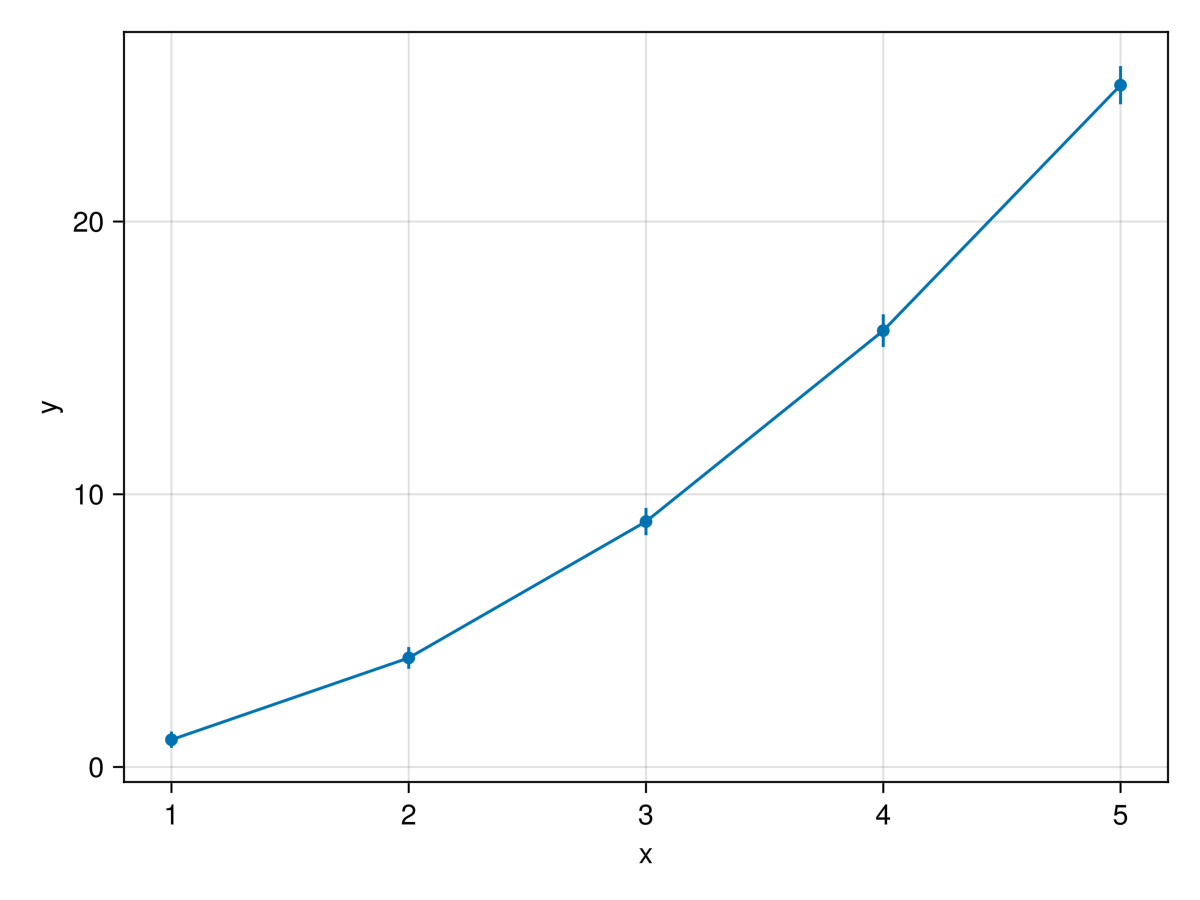

In [71]:
xvals=collect(1:5)
yvals=[x^2 for x in xvals]
errorvals=[0.2+x/10 for x in xvals]
f=Figure()
ax=Axis(f[1,1],xlabel="x",ylabel="y")
errorbars!(ax,xvals,yvals,errorvals) # plot error bars
plot!(ax,xvals,yvals) # add points
lines!(ax,xvals,yvals) # add line through data
f

<h2 style="border: 2px solid #000; border-radius: 10px; padding: 20px; background-color:red; color:white;" >
## Activity 10
</h2>

We are ready to choose parameters for our production runs.  How fine of grid of $\beta$'s do we want?  What system sizes?  How many realizations?

The answers to those questions depend on what sort of story telling we want to engage in.  A finer $\beta$ grid lets us give a more refined story about how the transition occurs. 
Larger system size would make it easier to extrapolate to the thermodynamic limit.  More realizations lead to smaller error bars, and more reliable results.  All of these take time, however, and it is a ballance to decide where to put our efforts.

Do we want to produce histograms?  In that case we need more data.  

Do we only need means?  In that case we can do with less.

Does your computer run slow?  In that case we may try to make do with less data.

On my computer the `ts8` data took 0.006s to generate.  The `ts64` data took about 6s.  In my eyes the `ts8` data was a bit sparse:  note enough $\beta$'s.  Probably not enough realizations.  The `ts64` data looked pretty good.  I personally am happy to have my computer run for minutes to hours to generate my final data set for this.  Thus I think I can probably go to a larger system size.  Thus I start by doing a crude sweep with a larger system size, to see what sort of timing to expect:

 12.862619 seconds (27.93 k allocations: 3.292 GiB, 1.40% gc time)


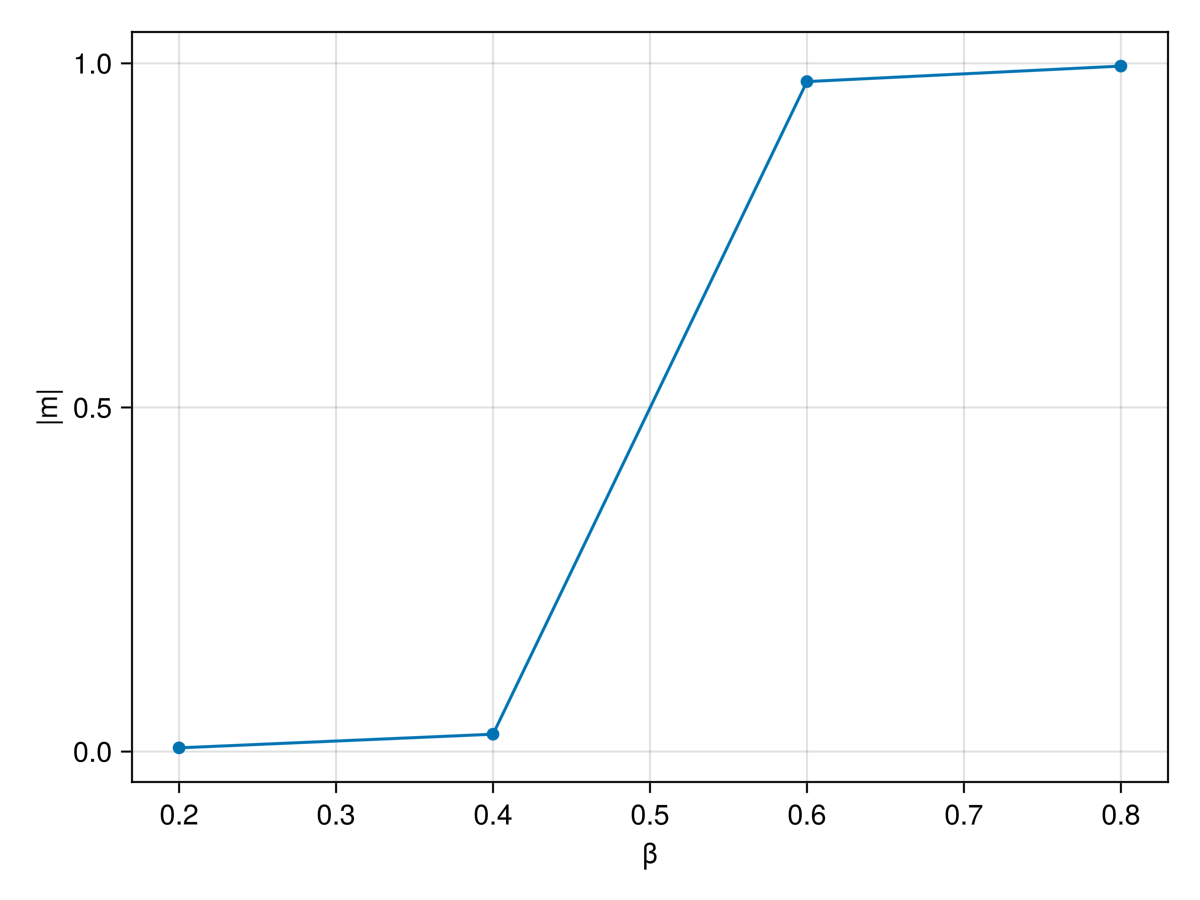

In [80]:
@time ts256=tempsweep(256,256,0.2,0.8,0.2,10,1000);
ams256=absmstats(ts256)
xvals=[ts256.betas...]
yvals=[m[1] for m in ams256]
errorvals=[m[2] for m in ams256]
f=Figure()
ax=Axis(f[1,1],xlabel="β",ylabel="|m|")
errorbars!(ax,xvals,yvals,errorvals) # plot error bars
plot!(ax,xvals,yvals) # add points
lines!(ax,xvals,yvals) # add line through data
f

On my computer that took about 13s, and the error bars look good.  Thus if I make a beta-spacing of 0.02, it would take 2 minutes.  I am happy with that.

Lets estimate the how the timing scales with system size

In [81]:
@time ts128=tempsweep(128,128,0.2,0.8,0.2,10,1000);
@time ts64=tempsweep(64,64,0.2,0.8,0.2,10,1000);

  3.056694 seconds (24.95 k allocations: 1.113 GiB, 1.95% gc time)
  0.818111 seconds (21.64 k allocations: 257.362 MiB, 2.11% gc time)


On my computer those took 3s, and 0.8s.  Thus it looks like the time is roughly scaling like the total number of spins.

Thus if a production run on 256x256 is supposed to take 2 minutes, a 512x512 system would take 8 minutes.  A 1024x1024 would be a bit over half an hour.  

Your timings will differ -- but for me, I am happy with that.  Thus for my production run I do:

    for j in 3:10
        println("generating data for j="*string(j))
        @time data=tempsweep(j,j,0.2,0.8,0.02,10,1000)
        filename="swp"*string(j)*".h5"
        savesweep(data,filename)
        println("saved data in file "*string(filename))
        println()
    end

Feel free to use a smaller maximum `j`, so that the timing is reasonable on your computer.  I will share my data with you -- but even if you only go up to 128x128, you already can get some pretty accurate estimates of the phase transition temperature, and get a good understanding of the phases.

Note:  If we had used Python, the program would have been significantly slower, and we would not be able to do as large of systems.  If we had used the local updates, things would have been much much slower -- and we likely would not have been able to get reliable data on a system larger than 128x128 (so an order of magnitude smaller).  Good algorithms are important!

Do NOT hand in your data files -- I don't want them.